In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

## Task 1 : Mean digits and Standard deviation digits

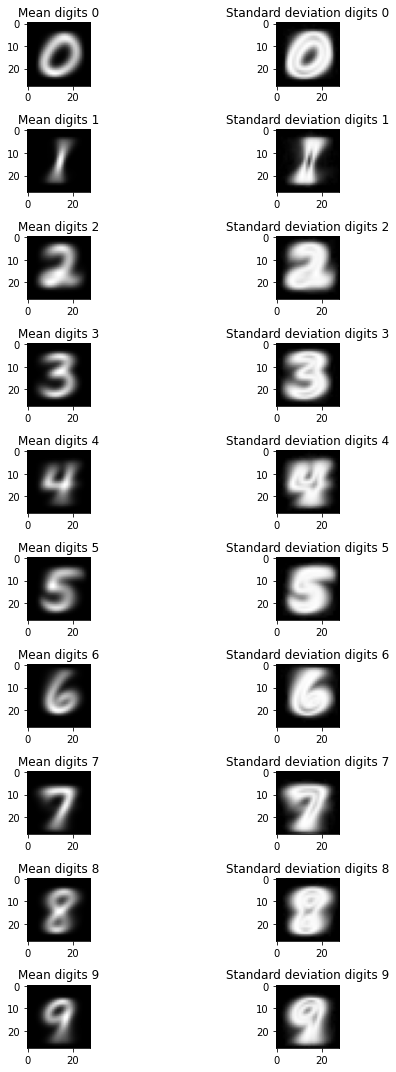

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
def MeanStdDigits(train_images, train_labels, test_images, test_labels):
  img_train_features= train_images.reshape((train_images.shape[0], -1))
  mean_features= np.array([img_train_features[train_labels == i].mean(axis=0) for i in range(10)])
  std_var_features= np.array([img_train_features[train_labels == i].std(axis=0) for i in range(10)])
  images_mean= mean_features.reshape(10, 28, 28)
  images_std= std_var_features.reshape(10, 28, 28)

  fig, axi = plt.subplots(10, 2, figsize=(9,15))
  for i in range(10):
      axi[i, 0].imshow(images_mean[i], cmap='gray')
      axi[i, 0].set_title('Mean digits {}'.format(i))
      axi[i, 1].imshow(images_std[i], cmap='gray')
      axi[i, 1].set_title('Standard deviation digits {}'.format(i))
  plt.tight_layout()
  plt.show()

MeanStdDigits(train_images, train_labels, test_images, test_labels)

## Task 2 :  

### Also calculating the Performance Accuracy and showing the Confusion Matrix

In [ ]:
training_data_arr= pd.read_csv('sample_data/mnist_train_small.csv')
image_data_arr= training_data_arr.iloc[:, 1:].values/255.0  
label_data_arr= training_data_arr.iloc[:, 0].values
train_images, test_images, train_labels, test_labels = train_test_split(image_data_arr, label_data_arr, test_size=0.9)

mean_arr= np.zeros((10,784))
var_arr= np.zeros((10,784))
pre= np.zeros(10)
for i in range(10):
    image_data_i= train_images[train_labels == i]
    mean_arr[i]= np.mean(image_data_i)
    var_arr[i]= np.var(image_data_i)
for i in range(10):
    pre[i] = np.mean(train_labels == i)
label_prediction = np.zeros(len(test_images))
discriminant_val = np.zeros((len(test_images),10))
for i in range(len(test_images)):
    probability_val = np.zeros(10)
    for j in range(10):
        discriminant_val[i][j] = np.sum(np.log(np.exp(-(test_images[i] - mean_arr[j])**2 / (2 * var_arr[j])) / np.sqrt(2 * np.pi * var_arr[j]))) + np.log(pre[j])
        probability_val[j] = discriminant_val[i][j]
    label_prediction[i] = np.argmax(probability_val)

perf_accuracy = np.sum(test_labels == label_prediction)/len(test_labels)
print('Performance Accuracy:', perf_accuracy)

conf_matrix = confusion_matrix(test_labels, label_prediction)
print("Confusion Matrix:")
print(conf_matrix)


Performance Accuracy: 0.21844444444444444
Confusion Matrix:
[[1021   48   87  125   61   78   15  142  153   22]
 [   6 1506    7    1   33    8   19  402    8   23]
 [ 627  135   98  154  116  111   42  286  181   44]
 [ 472  207  105  145  130  113   45  366  166   58]
 [ 172  355   85  115  144   90   67  521  114   69]
 [ 278  317   80  137  125   87   26  380  103   53]
 [ 409  241  114  119  147   98   85  374  160   80]
 [ 156  500   76   62  136   97  122  569  103   96]
 [ 548  123  107  160   92   97   25  311  194   66]
 [ 231  383   74   99  140   87   74  567  111   83]]


### 2. Correctly and Incorrectly classified images for each label, and the output of the Discriminant Functions


Label 0
Correctly classified images:


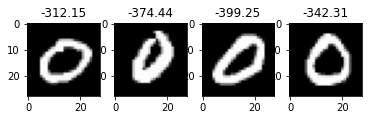

Incorrectly classified images:


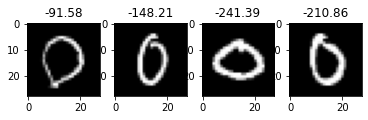

Label 1
Correctly classified images:


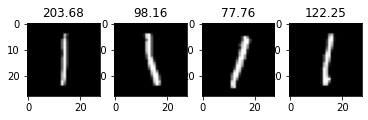

Incorrectly classified images:


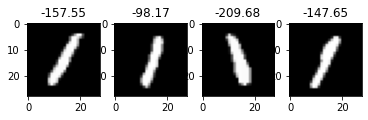

Label 2
Correctly classified images:


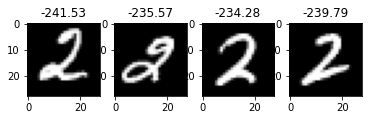

Incorrectly classified images:


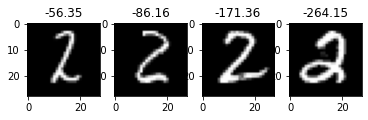

Label 3
Correctly classified images:


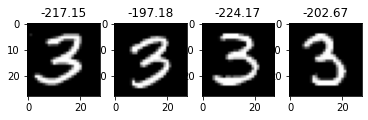

Incorrectly classified images:


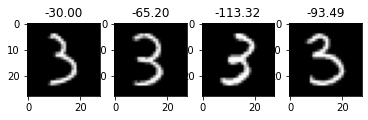

Label 4
Correctly classified images:


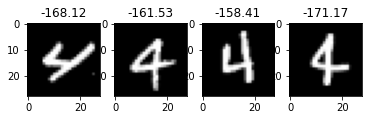

Incorrectly classified images:


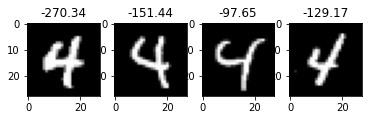

Label 5
Correctly classified images:


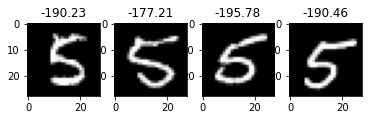

Incorrectly classified images:


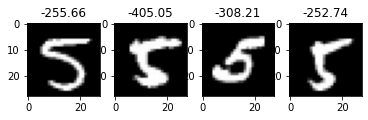

Label 6
Correctly classified images:


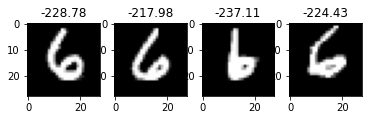

Incorrectly classified images:


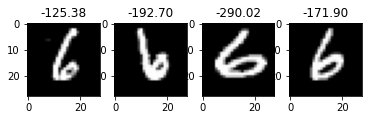

Label 7
Correctly classified images:


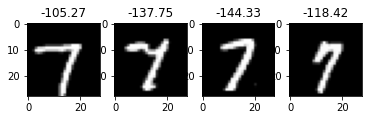

Incorrectly classified images:


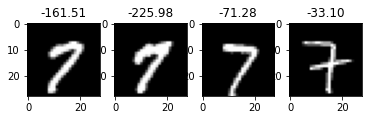

Label 8
Correctly classified images:


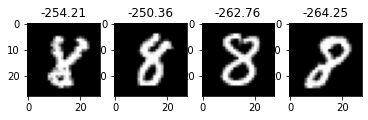

Incorrectly classified images:


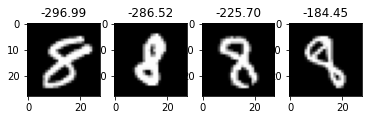

Label 9
Correctly classified images:


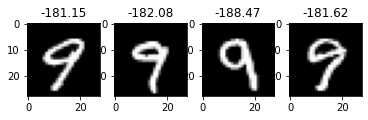

Incorrectly classified images:


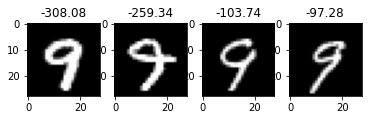

In [ ]:
for i in range(10):
    correct_img_index= np.logical_and(test_labels == i, test_labels == label_prediction)
    incorrect_img_index= np.logical_and(test_labels == i, test_labels != label_prediction)
    correct_image_data= test_images[correct_img_index]
    incorrect_image_data= test_images[incorrect_img_index]
    correct_discriminant_val= discriminant_val[correct_img_index]
    incorrect_discriminant_val= discriminant_val[incorrect_img_index]
    print('Label',i)
    print('Correctly classified images:')
    for j in range(min(4, len(correct_image_data))):
        plt.subplot(1,4,j+1)
        plt.imshow(correct_image_data[j].reshape(28,28), cmap='gray')
        plt.title('%.2f' % correct_discriminant_val[j][i])
    plt.show()
    print('Incorrectly classified images:')
    for j in range(min(4, len(incorrect_image_data))):
        plt.subplot(1,4,j+1)
        plt.imshow(incorrect_image_data[j].reshape(28,28), cmap='gray')
        plt.title('%.2f' % incorrect_discriminant_val[j][i])
    plt.show()

### 3. Why it doesn’t perform as well as many other methods?

The Gausian Naive Bayes doesn't perform as well as other methods because of several reasons :


*   *Conditional Independence*. Assumptions made on data may not be always right. Images being pixelated affects the features of the image and this can lead to decrease in performance accuracy.

*   *Linear Classifier*. It is a linear classifier which means it can only capture linear decision boundaries which might not be true for the boundaries of the MNIST dataset. This can affect performance accuracy.
*   *Loss Function*. The 0-1 loss function is very strict which means that any wrong classification even if it is small, is penalized equally. This is a problem for the MNIST dataset.

## Task 3 : Train a multi-class logistic regression model

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

mnist = fetch_openml('mnist_784', version=1)
train_images, test_images, train_labels, test_labels= train_test_split(mnist.data, mnist.target, test_size=0.9, random_state=42)
scaler= StandardScaler()
train_images= scaler.fit_transform(train_images)
test_images= scaler.transform(test_images)
model= LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42)
model.fit(train_images, train_labels)
label_prediction= model.predict(test_images)

perf_accuracy= accuracy_score(test_labels, label_prediction)
print("Performance Accuracy:", perf_accuracy)

conf_matrix= confusion_matrix(test_labels, label_prediction)
print("Confusion Matrix:")
print(conf_matrix)


Performance Accuracy: 0.8855396825396825
Confusion Matrix:
[[5900    2   53   17   20   69   66   33   39   11]
 [   1 6834   39   41    5   40    9   17   58    6]
 [  60   83 5331  194  123   79   89  160  130   37]
 [  37   47  242 5501   16  312   22   82  143   72]
 [  21   38   37   22 5499   27   76   53   72  299]
 [  84   49   57  151   98 4803  110   43  209   50]
 [  78   20   93   13   85  152 5691    4   36    6]
 [  25   39  104   97  112   30    3 5845   29  296]
 [  54  133  158  233   46  285   56   48 5007  115]
 [  42   43   68   85  201   75    4  288  105 5378]]


Label 0
Correctly classified images:
Incorrectly classified images:
Label 1
Correctly classified images:
Incorrectly classified images:
Label 2
Correctly classified images:
Incorrectly classified images:
Label 3
Correctly classified images:
Incorrectly classified images:
Label 4
Correctly classified images:
Incorrectly classified images:
Label 5
Correctly classified images:
Incorrectly classified images:
Label 6
Correctly classified images:
Incorrectly classified images:
Label 7
Correctly classified images:
Incorrectly classified images:
Label 8
Correctly classified images:
Incorrectly classified images:
Label 9
Correctly classified images:
Incorrectly classified images:


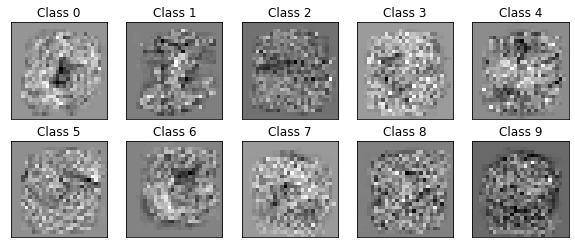

In [ ]:
for i in range(10):
    correct_img_index= np.logical_and(test_labels == i, test_labels == label_prediction)
    incorrect_img_index= np.logical_and(test_labels == i, test_labels != label_prediction)
    correct_image_data= test_images[correct_img_index]
    incorrect_image_data= test_images[incorrect_img_index]
    print('Label',i)
    print('Correctly classified images:')
    for j in range(min(4, len(correct_image_data))):
        plt.subplot(1,4,j+1)
        plt.imshow(correct_image_data[j].reshape(28,28), cmap='gray')
    plt.show()
    print('Incorrectly classified images:')
    for j in range(min(4, len(incorrect_image_data))):
        plt.subplot(1,4,j+1)
        plt.imshow(incorrect_image_data[j].reshape(28,28), cmap='gray')
    plt.show()

fig, axi = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axi.ravel()):
    coef = model.coef_[i]
    ax.matshow(coef.reshape(28,28), cmap=plt.cm.gray)
    ax.set_title(f'Class {i}')
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()




## References :



*   https://richcorrado.github.io/MNIST_Digits-overview.html

*   https://medium.com/hackernoon/implementation-of-gaussian-naive-bayes-in-python-from-scratch-c4ea64e3944d

*   https://rnagara1.medium.com/mnist-handwritten-image-classification-with-naive-bayes-and-logistic-regression-9d0dd2b6edc0

*   https://www.kaggle.com/code/gideon94/multiclass-logistic-regression-from-scratch

*   https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

